In [1]:
import numpy as np

np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [2]:
#!pip install chart_studio
#!pip install -U scikit-learn

In [3]:
from reconstruction.model import LoadModel
import matplotlib.pyplot as plt

#from plotly import __version__
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import reconstruction
import reconstruction.utils.plot
import importlib; importlib.reload(reconstruction.utils.plot)
from reconstruction.utils.plot import plot_vol, plot_reconstruction
from reconstruction.utils.data_prep import get_fractured

In [4]:
data = np.load('C:/Users/Sebastian/Documents/ML-TF/ModelNet10/voxels.npy').item()['test']['data']

In [5]:
def plot_one(vox):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect('auto')

    ax.voxels(vox, facecolor='#1B699F', edgecolor="k")

    plt.show()
    
def plot_two(vox, vox2):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect('auto')

    ax.voxels(vox, facecolor='#1B699F', edgecolor="k")
    ax.voxels(vox2, edgecolor="k")

    plt.show()


def plot_recon(vox, vox2):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect('auto')

    ax.voxels(np.subtract(vox, vox2, dtype=np.float32), facecolor='r',edgecolor="k")
    ax.voxels(vox, facecolor='#1B699F', edgecolor="k")

    plt.show()

In [6]:
# random object
d = data[np.random.choice(len(data))]
fractured = get_fractured(d)

#print(fractured)
print('Fractured:')
#plot_vol(fractured)
print('Source:')
#plot_vol(d)

Fractured:
Source:


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_57836\2207456589.py:2: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



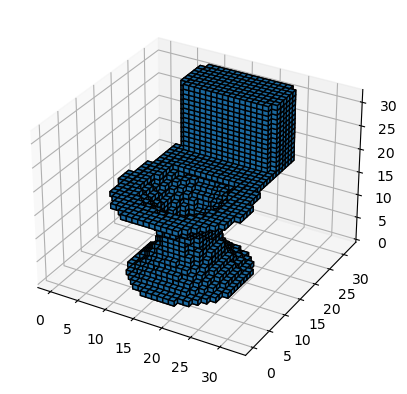

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('auto')

ax.voxels(d, facecolor='#1B699F', edgecolor="k")

plt.show()

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_57836\3660955900.py:2: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



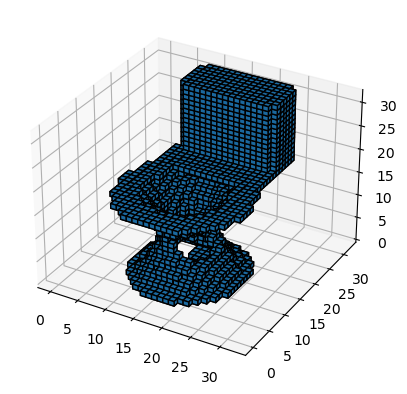

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('auto')

ax.voxels(fractured, facecolor='#1B699F', edgecolor="k")

plt.show()

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_57836\2678462284.py:2: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



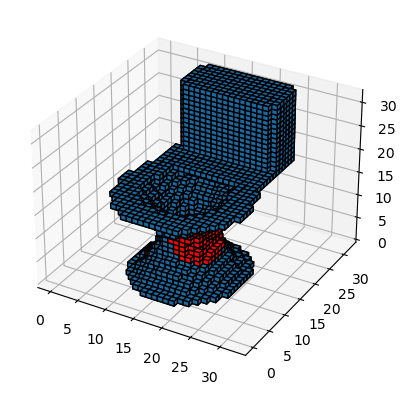

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('auto')

ax.voxels(np.subtract(fractured, d, dtype=np.float32), facecolor='r',edgecolor="k")
ax.voxels(fractured, facecolor='#1B699F', edgecolor="k")

plt.show()

In [10]:
# Load model
model = LoadModel('modelnet10', 'data/prueba/', opt='voxels-usegan', evaluate_mode=True)
#model = LoadModel('arq_dataset', 'data/arq_usegan_extended/', opt='voxels-usegan', evaluate_mode=True)
# Load data
model._load_full_test_set()
voxels, voxels_target, labels = model.full_test_data

Found 'data/prueba/generator_log.csv'
Found 'data/prueba/training_log.csv'
Found 'data/prueba/model_generator.h5'
Found 'data/prueba/discriminator_log.csv'
Found 'data/prueba/model_discriminator.h5'
ModelNet10/voxels.npy


C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning:

Trying to unpickle estimator LabelEncoder from version 1.1.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



# La siguiente celda cuando la corres por segunda vez si funciona por alguna razon

In [11]:
model._load_full_test_set(min_points=2, max_points=5,
                          min_radius=6, max_radius=10, sphere_chance=.9)
voxels, voxels_target, labels = model.full_test_data
result = model.predict(voxels, labels)

arq_voxels, arq_voxels_target, arq_labels, arq_result = voxels, voxels_target, labels, result

ModelNet10/voxels.npy
Loading models...
Instructions for updating:
Colocations handled automatically by placer.
Loaded weights from files


C:\Users\Sebastian\anaconda3\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



In [12]:
lbl = model.label_encoder.transform(['bathtub'])[0]
arq_voxels = voxels[labels == lbl]
arq_voxels_target = voxels_target[labels == lbl]
arq_labels = labels[labels == lbl]
arq_result = model.predict(arq_voxels, arq_labels)

In [13]:
print(model.label_encoder.classes_)

['bathtub' 'bed' 'chair' 'desk' 'dresser' 'monitor' 'night_stand' 'sofa'
 'table' 'toilet']


In [14]:
len(arq_voxels)

50

In [17]:
l1loss = lambda a, b: np.mean(np.abs(a - b))
n = arq_voxels.shape[0]

# Uncomment the desire choice
i = np.random.choice(n) # get random index
#i = np.random.choice(np.argsort(improvement)[::-1][:int(n*.07)]) # get good result
#i = np.random.choice(np.argsort(improvement)[:int(n*.07)]) # get bad result

print('Complete object:')

#plot_vol(arq_voxels_target[i])###############################################################
n_voxels_target = np.sum(arq_voxels_target[i] == 1)

size = 10
print('Fractured object (l1=%.4f):' % l1loss(arq_voxels_target[i], arq_voxels[i]))
n_voxels = np.sum(arq_voxels[i] == 1)
missing_points = n_voxels_target - n_voxels
perc_missing = missing_points * 100 / n_voxels_target
print(f'Missing voxels: {missing_points} (%.2f%%)' % perc_missing)
#plot_one(arq_voxels[i])
plot_vol(arq_voxels[i], s=size)

print('Reconstruction (l1=%.4f):' % l1loss(arq_voxels_target[i], arq_result[i]))
missing_points_result = np.sum((arq_voxels_target[i] + (arq_result[i] > 0)) == 0)
extra_points = np.sum((arq_voxels_target[i] + (arq_result[i] > 0)) == 1)
print(f'Missing voxels    : {missing_points} -> {missing_points_result}')
print(f'Extra voxels added: {extra_points}')
#plot_vol(arq_voxels_target[i], s=size) #completo
plot_reconstruction(arq_voxels[i], arq_result[i], s=size)
# plot_reconstruction(arq_voxels[i], arq_voxels_target[i], s=size)
rerecon = model.predict_one(arq_result[i], 'bathtub', decode_label=True)
plot_reconstruction(arq_voxels[i], rerecon[0], s=size)
rererecon = model.predict_one(arq_result[i], 'bathtub', decode_label=True)
plot_reconstruction(arq_voxels[i], rererecon[0], s=size)

Complete object:
Fractured object (l1=0.0674):
Missing voxels: 1104 (56.97%)


Reconstruction (l1=0.4126):
Missing voxels    : 1104 -> 13
Extra voxels added: 1104


In [16]:
test = model.predict_one(d, 'sofa', decode_label=True)
#plot_one(test[0])
plot_reconstruction(d, test[0], s=size)